In [1]:
%%capture
# DO NOT EDIT THIS NOTEBOOK
# It generates a report to verify your submission
import logging, sys, os
logging.disable(sys.maxsize)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import solution
import time
start_verify = time.time()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3)

In [2]:
%matplotlib inline
import os
import pickle
import pandas as pd
import numpy as np
import pydot
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import inspect
from IPython.core import page
page.page = print

grades = []

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')
        
def printSource(obj):
    print(''.join(str(x) for x in inspect.getsourcelines(obj)[0]))
        
# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

def print_answer(ans):
    output = ""
    for line in ans.splitlines()[1:]:
        output += line.strip() + " "
    output += "(length: "+str(len(output))+")\n"
    print(output)
        
def run_evaluation(name, model_builder, data, base_dir, target_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, print_model=True, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        grades.append("0")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Model not trained? Skipping.", verbose)
    else: # Load from file
        model = solution.load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
    # Report
    lc = pd.DataFrame(learning_curves)
    print("Max val score: {:.2f}%".format(lc.iloc[:,3].max()*100))
    grades.append("{:.2f}".format(lc.iloc[:,3].max()*100))
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    plt.show()
    
    if print_model:
        print(model.summary())
    plot_model(model, to_file=os.path.join(target_dir,name+'.png'), show_shapes=True, show_layer_names=False)
        
import pprint
pp = pprint.PrettyPrinter(indent=4)

### Web Information Retrieval and Data Mining - Assignment 3

In [3]:
grades.append(solution.target_dir.split(os.sep)[-1])
grades.append(solution.your_name)
print("Student: {0} ({1})".format(solution.your_name,solution.student_id))

Student: Campitelli, Leonardo (1553429)


#### Answer 1.1, Baseline (4p)
- Dense network, at least 3 layers, shaped like a pyramid
    - Last layer: 10 nodes, sigmoid. 
    - Loss: categorical cross-entropy. Metric: accuracy
- No preprocessing, regularization. Get at least 70% accuracy.
- Explain design decisions. Discuss performance.
    - Does it overfit (large/growing gap between loss and val_loss)?

best trade off between trainig speed and accuracy scores is achieved using 25 epochs and 128 starting nodes, halving those at each layer to attain the requested pyramidal shape. Tanh proves to be a better activation function than relu for the last layer. Regularization is needed as the model seems to be overfitting. (length: 318)



Max val score: 75.95%


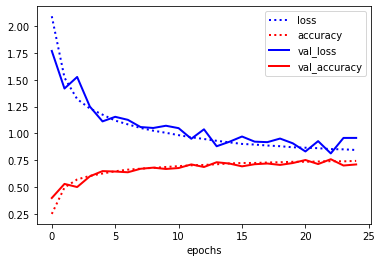

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________
None


def build_model_1_1():
    model = models.Sequential()
    
    #Input Layer
    #model.add(layers.Input(input_shape=(32,32,3)))
    model.add(layers.Flatten(input_shape = (32,32,3)))
    
    #Dense Layers requested
    max_num_nodes = 128 #Layers will have increasingly fewer nodes starting from here
    model.add(layers.Dense(max_num_nodes,   activation='relu')) #, input_shape=(32,32,3)))
    model.add(layers.Dense(int(max_num_nodes/2), activation='relu'))
    model.add(layers.Dense(int(max_num_nodes/4), activation='tanh'))
    #model.add(layers.Dense(max_num_nodes/8, activation='relu'))
    
    #Output Layer
    #model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))
    
    #Compiling model
    model.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics =['accuracy'])
    return model



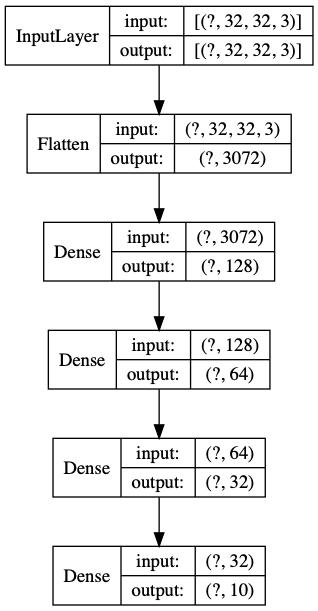

In [4]:
print_answer(solution.answer_q_1_1)
run_evaluation("model_1_1", solution.build_model_1_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_1
if os.path.exists(os.path.join(solution.target_dir,'model_1_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_1_1.png'), width=200))

#### Answer 1.2, Preprocess (2p)
- Convert images to greyscale, other preprocessing optional.
    - Input shape should be (32,32,1)
- Explain design decisions. Is it better? Why (not)? 
    - Color information is likely not so useful for classification. Greyscale makes the network smaller, less parameters to learn, less likely to overfit.

better than the previous one. Regularization is needed since the accuracy of the model remains fixed while loss values increase. This is a sign of overfitting. (length: 160)



Max val score: 75.80%


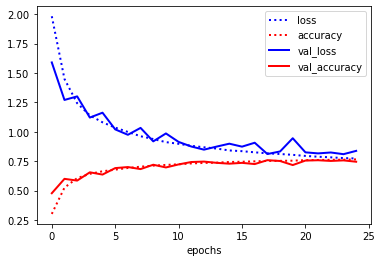

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                330       
Total params: 141,866
Trainable params: 141,866
Non-trainable params: 0
_________________________________________________________________
None
def build_model_1_2():
    model = models.Sequential()
    
    #Input Layer
    model.add(layers.Flatten(inp

In [5]:
print_answer(solution.answer_q_1_2)
run_evaluation("model_1_2", solution.build_model_1_2, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_2

#### Answer 1.3, Tune (4p)
- Regularize the model. What works best? 
    - Should consider batch normalization, dropout, l1/l2 regularization (or Nesterov)
- Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
    - At least consider tuning learning rate, ideally also momentum, decay, other optimizers 
- Explain your findings and final design decisions. Discuss the results.
    - Should be better, at least it shouldn't overfit

values as stronger regularization yields low scores. Default learning rate was too high for the model to properly train. A lower learning rate lets the model to better fit the training data. This may make the model overfit so I added regularization to all layers, with different values. The model overfits less than the previous ones thanks to the added regularization. (length: 370)



Max val score: 77.67%


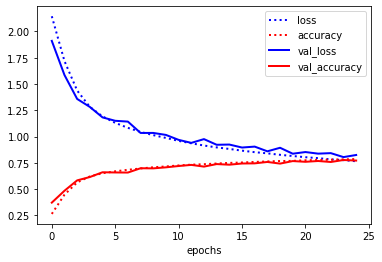

def build_model_1_3():
    model = models.Sequential()
    
    #Input Layer
    model.add(layers.Flatten(input_shape=(32,32,1)))
    
    
    max_num_nodes = 128 
    model.add(layers.Dense(max_num_nodes,   activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
    #model.add(layers.Dropout(0.4))
    model.add(layers.Dense(max_num_nodes//2, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
    #model.add(layers.Dropout(0.3))
    model.add(layers.Dense(max_num_nodes//4, activation='tanh', kernel_regularizer=regularizers.l2(0.0005)))
    #model.add(layers.Dropout(0.2))
    
    #Output Layer
    model.add(layers.Dense(10, activation='softmax'))
    
    #Compiling model
    opt = optimizers.RMSprop(learning_rate=0.0001)
    model.compile(optimizer=opt,
                 loss='categorical_crossentropy',
                 metrics =['accuracy'])
    return model



In [6]:
print_answer(solution.answer_q_1_3)
run_evaluation("model_1_3", solution.build_model_1_3, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
%psource solution.build_model_1_3

#### Answer 2.1, ConvNet (7p)
- Build a sequential ConvNet, get at least 90% accuracy.
    - Conv2D layers, input shape (32,32,1)
    - Consider using blocks of Conv2D layers with maxpooling in between
    - Use zero-padding in Conv2D layers because the images are small
    - At least one dense hidden layer and dense output layer (sigmoid)
    - Consider adding batch normalization, dropout
    - Consider small dropout rates in beginning, larger dropout rates later in network
    - Consider other optimizers and tuning learning rate, momentum,...
- Explain what you did and why (800 chars). Is it working well?
    - Should be quite elaborate and sensible

After a max Pooling layer with default 2x2 size, images are now 15x15x32 features maps. Filter number is increased to avoid decreasing the number of activations. Last Dense layer matches the number of features generated by the convolution, plus the needed 10 nodes output layer. Tanh proved to be a better activation function than relu for the last dense layer, providing higher accuracy scores. Almost no overfitting seems to happen with the added Dropout layer and Batch Normalization. All convolutional layers use padding to not lose information upon processing the images. (length: 577)



Max val score: 92.25%


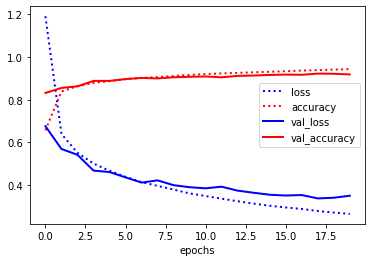

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
last_conv_layer (Conv2D)     (None, 8, 8, 128)         73856     
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 128)         512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)        

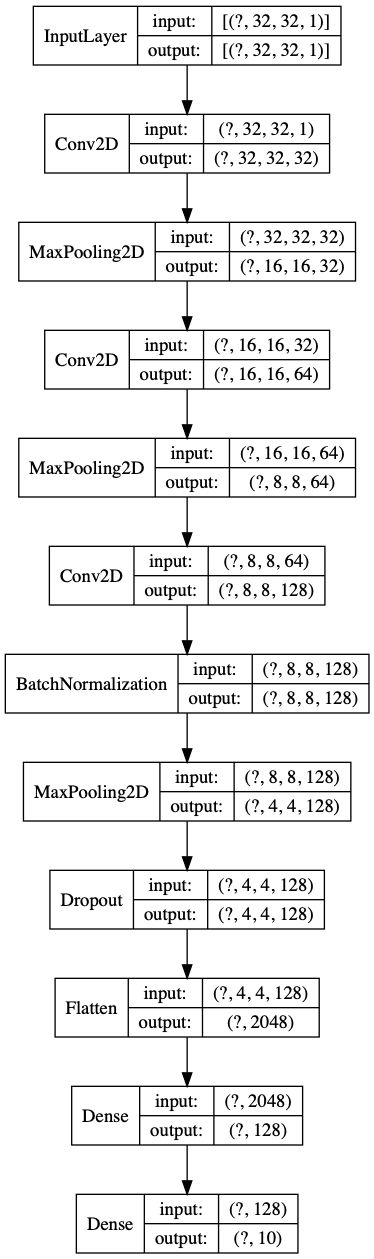

In [7]:
print_answer(solution.answer_q_2_1)
run_evaluation("model_2_1", solution.build_model_2_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_2_1
if os.path.exists(os.path.join(solution.target_dir,'model_2_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_2_1.png'), width=200))

#### Answer 2.2, Data Augmentation (3p)
- Augment the preprocessed training data.
    - Use small variations (small shifts up-down, left-right) of flips becasue the images are small
    - Large shifts and rotations distort the image too much
- Explain what you did and why. Discuss the performance of the model.

vertical flip. The dataset used is quite big, so augmentation may not be helpful. In fact, during tests, augmenting data did not provide great results and in most cases decreased accuracy scores. Best results were obtained with minimal augmentations, zoom_range set to 0.1 and shear_range to 0.1. Increasing these vaues and using shifts decreased accuracy to about 90% (length: 369)



Max val score: 92.82%


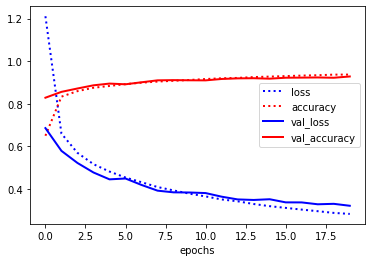


train_datagen = ImageDataGenerator(
    #rescale = 1/255,
    #rotation_range = 90,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    shear_range = 0.1,  #(0.3)


In [8]:
print_answer(solution.answer_q_2_2)
run_evaluation("model_2_2", solution.build_model_2_1, solution.augmented_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
print(solution.dg_code)

#### Answer 3.1, Misclassifications (2p)
- Report the test score (on the held-out test data)
    - Should be similar to score of previous model
- Plot confusion matrix, discuss which classes are often confused.
    - class 1 and 2 are most often confused
- Visualize the misclassifications in more depth by focusing on a single class
- Analyse which kinds of mistakes are made for that class.
    - Should contain some insight (e.g. misclassifications when the numbers are curly or noisy)

Number 1 may be confused as a 7 or a 4 due to image shearing used during augmentation phase. It's interesting how number 1 is rarely confused for a 10 rather than other classes. Other numbers seem to be recognized just fine, with little misclassification. Best results are obtained with numbers 7 and 10. As expected, rotated number 1s can be misclassified as 7 or 4 due to their position. There are also some 0s becoming too slim and thus classified as 1s. Misclassification happens also due to surrounding numbers, when the main number to classify is not fully centered, probably due to the augmentations used like zooming. (length: 626)

Test score: 0.93%


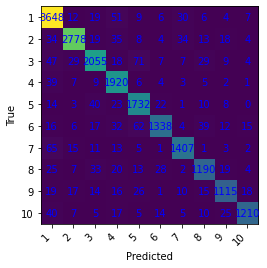

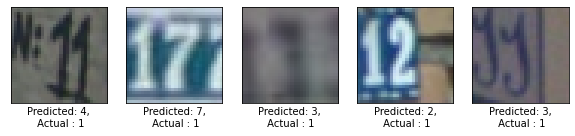

In [9]:
print_answer(solution.answer_q_3_1)
if hasattr(solution, 'test_accuracy_3_1'):
    try:
        print("Test score: {:.2f}%".format(solution.test_accuracy_3_1))
    except TypeError:
        print("Test score:",solution.test_accuracy_3_1)
else:
    print("Test score NOT FOUND: test_accuracy_3_1 missing")
try:
    solution.plot_confusion_matrix()
except:
    print("ERROR, could not build confusion matrix. Please check original report")
try:
    solution.plot_misclassifications()
except:
    print("ERROR, could not build misclassification plot. Please check original report")

#### Answer 3.2, Activations (4p)
- Retrieve and visualize the activations for one example
- For every filter for different convolutional layers (at different depths in the network).
- Give an explanation. Is your model indeed learning something useful?
    - Should detect edges etc in first layers, higher-order object (e.g. interesting regions) in deeper layers.

There are some activations totally unresponsive which may be used to recognized more rigid-shaped numbers as 1s or 7s. Some filters seems to focus on the space around the number itself. For the second layer, filters seems to focus more on round shapes inside the number itself and round borders. Last layer focuses on totally abstract patterns quite hard to see (length: 362)



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
last_conv_layer (Conv2D)     (None, 8, 8, 128)         73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)        

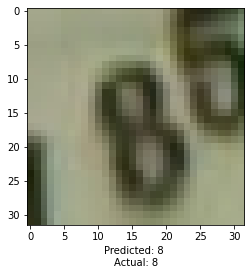

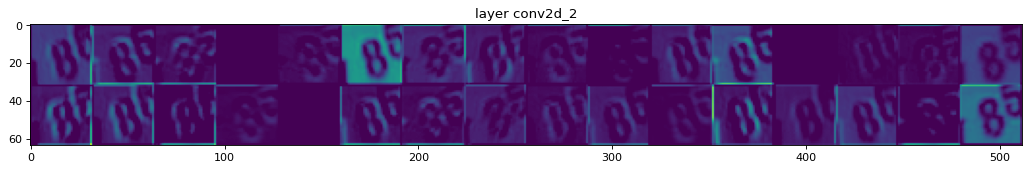

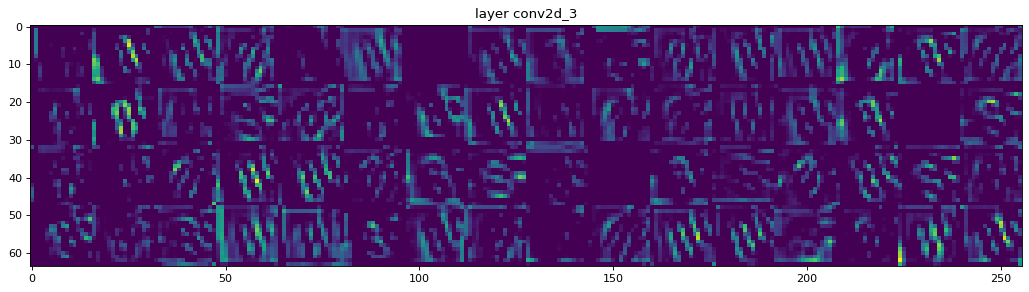

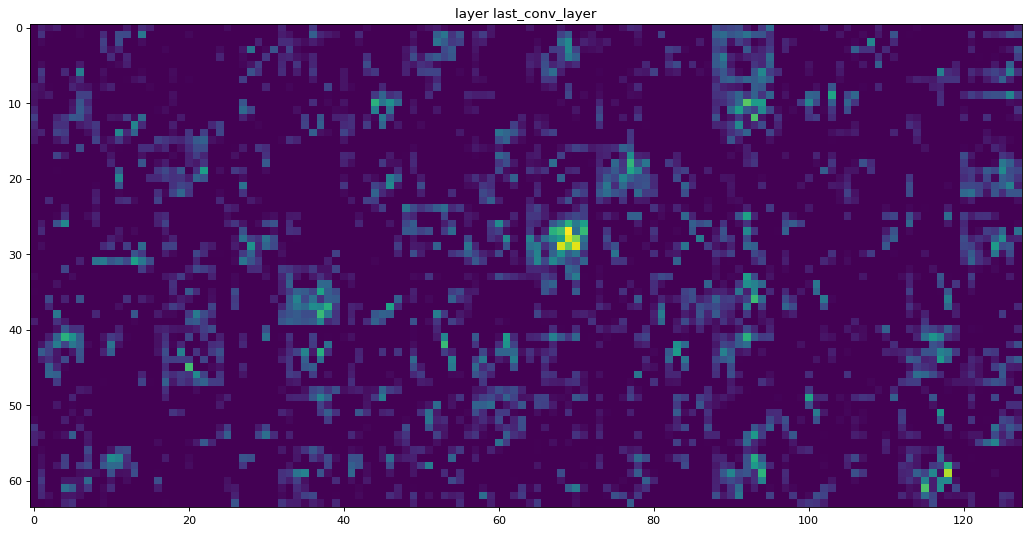

In [10]:
print_answer(solution.answer_q_3_2)
try:
    solution.plot_activations()
except:
    print("ERROR, could not build activation plot. Please check original report")

#### Answer 3.3, Class activation map (4p)
- Show a class activation map for your last convolutional layer
- Superimpose the activation map over the image, or plot side by side
    - Should make sense, detect interesting regions to classify the number

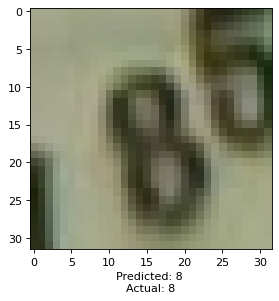

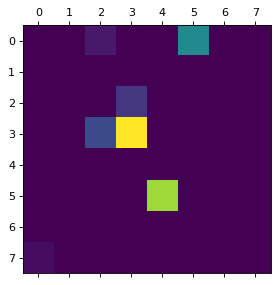

def plot_3_3():
  model = load_model_from_file(base_dir, 'model_2_2')
  #model.summary()
  idx = 0 #Image to use for activation analysis

  y_pred = m.predict(rgb2gray(X_test))

  img = X_test[idx] #Test img
  img_label = y_test[idx]

  #Plot test image that will be used
  fig, ax = plt.subplots(1,1)
  plt.imshow(img)
  ax.set_xlabel('Predicted: {} \nActual: {}'.format((np.argmax(y_pred[idx])+1)%10, (np.argmax(y_test[idx])+1)%10)) # Label is index+1

  #Model trained over grayscale images, taking the preprocessed image
  img = rgb2gray(X_test)[idx]
  img = np.expand_dims(img, axis=0)

  #Computing heatmap
  with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer('last_conv_layer')
    iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(img)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
 

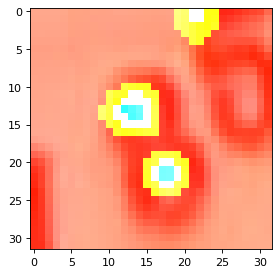

In [11]:
try:
    solution.plot_3_3()
except:
    print("ERROR, could not build class activation plot. Please check original report")
if hasattr(solution, 'plot_activation_map'):
    %psource solution.plot_activation_map
else:
    %psource solution.plot_3_3

#### Answer 4.1, Fast feature extraction (5p)
- Import the VGG16 model, pretrained on ImageNet
- Freeze convolutional base, adds a dense layer
- Consider unfreezing the last few convolutional layers and evaluate whether that works better
    - Check if they do. It is very likely to help.
- Discuss the observed performance
    - Should get around 80% accuracy

last layer unfrozen makes the model overfit quite a lot on the given training set. Accuracy improves when all last convolutional layers are trained along the dense layers, reaching about 80%, however the model starts to heavily overfit around the 10th epoch, so training has to end before that point (length: 300)



Max val score: 82.33%


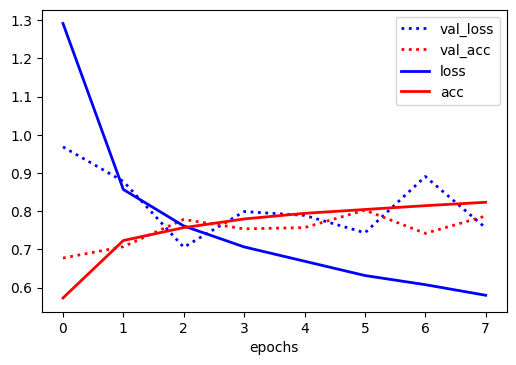

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 14,982,474
Trainable params: 7,347,210
Non-trainable params: 7,635,264
_________________________________________________________________
None


def build_model_4_1():
  m = models.Sequential()
  conv_base = VGG16(weights = 'imagenet', include_top=False, input_shape=(32,32,3))

  for l in conv_base.layers[:15]: #Setting all layers but the last 3 convs to non trainable, will set the last 3 layers separately
    l.trainable = False
  
  conv_base.get_layer('block5_conv1').trainable = True
  conv_base.get_layer('block5_conv2').trainable = True 
  conv_base.get_layer('block5_conv3').trainable = True

  m.add(conv_base)
  m.add(layers.Flatten())
  m.add(layers.Dense(512, activation = 'relu', input_shape = (1,1,512)))
  #m.add(layers.Dropout(0.5))
  m.add(layers.Dense(10, activation = 'softmax'))

  opt = optimizers.RMSprop(lr=0.001)

  m.compile(
      optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['acc'])
  
  return m



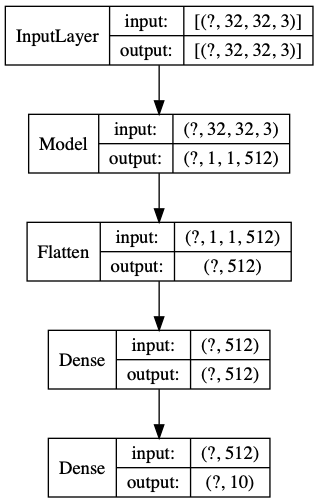

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

print_answer(solution.answer_q_4_1)
run_evaluation("model_4_1", solution.build_model_4_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_4_1
if os.path.exists(os.path.join(solution.target_dir,'model_4_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_4_1.png'), width=200))
#solution.build_model_4_1().layers[0].summary()

#### Answer 4.2, Embeddings (5p)
- Generate embeddings with the trained convolutional part of model_4_1 (without the dense layer)
- Embed the training and test data and store them to disk
- Build and evaluate a pipeline on the embedded data
    - Check if pipeline makes sense (e.g. use models that can handle many dimensions)
- Describe what you did and what you observed (max 800 chars).
    - Consider different models, preprocessing, tuning, etc.
    - Check performance (see original Submission.html) when in doubt. We did not run all the evaluations because it takes too long, and the output is ill-defined.

In [13]:
print_answer(solution.answer_q_4_2)
print(solution.generate_pipeline())
#print("Evaluation:",solution.evaluation_4_2(solution.X_train, solution.y_train, solution.X_test, solution.y_test))
%psource solution.store_embeddings
%psource solution.evaluation_4_2

much quicker in both training and evaluation. Testing multiple preprocessing techniques, I got the best accuracy scores using a normalizer over the embeddings and then using a RFC with 150 estimators. This setup yields accuracy around 81%, still not as good as the convolutional neural network. Overall low scores with VGG16 may be because that net is trained over animal images instead of numbers. (length: 399)

Pipeline(steps=[('Normalizer', Normalizer()),
                ('classifier', RandomForestClassifier(n_estimators=150))])
def store_embeddings():
  """ Stores all necessary embeddings to file
  """
  model = load_model_from_file(base_dir, 'model_4_1')
  conv_base = model.get_layer('vgg16')  #Output size 1x1x512
  try:
    load_embedding('train')
    shout('Training set embeddings loaded')
  except FileNotFoundError:
    train_emb = conv_base.predict(X_train)  # creates 63544 filters 1 x 1 x 512
    train_emb = np.reshape(train_emb, (63544, 512))
    store_embedding(train_emb, 'tra

In [14]:
end_verify = time.time()
print("Running time: {:.2f} seconds".format(end_verify - start_verify))
print("Last modified: {}".format(solution.last_edit))
print("scikit-learn version: {0}".format(solution.sklearn_version))

with open(solution.grade_file, "a") as myfile:
    myfile.write(','.join(grades)+"\n")

Running time: 46.60 seconds
Last modified: May 26, 2020
scikit-learn version: 0.23.1
